# Gaussian Elimination

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#this line is only needed in Jupyter notebooks
%matplotlib inline

We want to solve the following system:

$$3 x_1 + 2 x_2 + x_3 = 6$$
$$-x_1 + 4 x_2 + 5x_3 = 8$$
$$2x_1 -8 x_2 + 10 x_3 = 4$$

In matrix form this looks like

$$\underbrace{\begin{pmatrix} 3 & 2 & 1\\ -1 & 4 & 5\\ 2& -8 & 10\end{pmatrix}}_{\mathbf{A}} ~
\underbrace{\begin{pmatrix} x_1\\x_2\\x_3\end{pmatrix}}_{\mathbf{x}} = \underbrace{\begin{pmatrix}6\\8\\4\end{pmatrix}}_{\mathbf{b}}
$$

Another way to write this is a notational shorthand called an **augmented matrix**, where we put the righthand side into the matrix:

$$
\left(\begin{array}{ccc|c}   3 & 2 & 1 &6\\ -1 & 4 & 5&8\\ 2& -8 & 10&4\end{array}\right)
$$

We will use **Gaussian elimination** to solve this system.

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;">
<b>Class Activity</b>: Perform Gaussian elimination with pencil and paper to convert the above matrix into row echelon form .
</div>

First, we assemble the augmented matrix.

In [2]:
# Declare matrix
A33 = np.matrix([(3,2,1),(-1,4,5),(2,-8,10)])
b3 = np.matrix([6,8,4])

# Assemble augmented matrix
# Study question: Why is it important to use .copy() here?
aug_matrix = np.zeros((3,4))
aug_matrix[0:3,0:3] = A33.copy()
aug_matrix[:,3] = b3.copy() # Why do we access column 4 with index 3?

print(aug_matrix)

[[ 3.  2.  1.  6.]
 [-1.  4.  5.  8.]
 [ 2. -8. 10.  4.]]


## Gaussian Elimination: First Column


**Step 1**: Eliminate the **-1** in the first column, second row.

Multiply first row by (1/3) and add to second row:

In [3]:
#add row 2 to 1/3 times row 1
row13 = aug_matrix[0]/3 #row1 * 1/3
new_row2 = aug_matrix[1] + row13 #add 1/3 row 1 to row 2
#replace row 2
aug_matrix[1,:] = new_row2
print("New matrix =\n",aug_matrix)

New matrix =
 [[ 3.          2.          1.          6.        ]
 [ 0.          4.66666667  5.33333333 10.        ]
 [ 2.         -8.         10.          4.        ]]


**Step 2**: Eliminate **2** in first column.

Multiply first row by (-2/3) and add to third row:

In [4]:
#add row 3 to -2/3 times row 1
row23 = -2*aug_matrix[0]/3 #row1 * -2/3
new_row3 = aug_matrix[2] + row23 #add -2/3 row 1 to row 3
#replace row 3
aug_matrix[2] = new_row3
print("New matrix =\n",aug_matrix)

New matrix =
 [[ 3.          2.          1.          6.        ]
 [ 0.          4.66666667  5.33333333 10.        ]
 [ 0.         -9.33333333  9.33333333  0.        ]]


## Gaussian Elimination: Second Column

**Step 3**: Eliminate **-9$\frac{1}{3}$** from the last row.

Multiply row 2 by 9$\frac{1}{3}$/4$\frac{2}{3}$ and add to last row:

In [5]:
#add row 3 to 9.33333/4.66666 times row 2
modrow = (9+1./3)/(4+2./3)*aug_matrix[1] #row2 * (-9+1./3)/(4+2.0/3)
new_row3 = aug_matrix[2] + modrow #add -2/3 row 1 to row 3
#replace row 3
aug_matrix[2] = new_row3.copy()
print("New matrix =\n",aug_matrix)

New matrix =
 [[ 3.          2.          1.          6.        ]
 [ 0.          4.66666667  5.33333333 10.        ]
 [ 0.          0.         20.         20.        ]]


Notice that we have manipulated our original system into the equivalent system

$$
\left(\begin{array}{ccc|c}   3 & 2 & 1 &6\\ 0 & 4\frac{2}{3} & 5\frac{1}{3}& 10\\ 0& 0 & 20&20\end{array}\right)
$$

or

$$
\left(\begin{array}{ccc}   3 & 2 & 1 \\ 0 & 4\frac{2}{3} & 5\frac{1}{3}\\ 0& 0 & 20\end{array}\right) \begin{pmatrix}x_1\\x_2\\x_3\end{pmatrix} =
\begin{pmatrix} 6\\10\\20\end{pmatrix}
$$

## Back Substitution

We can easily solve this via **back substitution**:
1. Take the last equation and solve for $x_3$.
2. Plug the value for $x_3$ into the second equation, solve for $x_2$.
3. Plug both into the first equation and solve for $x_1$.


We will now perform backward substitution in Python.

In [6]:
#backsubstitution
x3 = aug_matrix[2,3]/aug_matrix[2,2] #solve for x3
print("x3 =",x3)
#now solve for x2
x2 = (aug_matrix[1,3] - x3*aug_matrix[1,2])/aug_matrix[1,1]
print("x2 =",x2)
#now solve for x1
x1 = (aug_matrix[0,3] - x3*aug_matrix[0,2]- x2*aug_matrix[0,1])/aug_matrix[0,0]
print("x1 =",x1)

x3 = 1.0
x2 = 1.0
x1 = 1.0


The solution we get is

$$x_1 = 1,$$

$$x_2 = 1,$$

$$x_3 = 1.$$

We can check this by plugging it in.

## Verify Solution

We can verify our solution is correct by computing $\mathbf{A} \cdot \mathbf{x}$ and comparing to $\mathbf{b}$.

We can easily perform this matrix multiplication by Python too.

In [7]:
x = np.array([1,1,1])
print(np.dot(A33,x),"-",b3,"=",np.dot(A33,x)-b3)

[[6 8 4]] - [[6 8 4]] = [[0 0 0]]


## Generalized Gaussian Elimination

## Pseudocode

<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;">
Pseudocode for a function that performs Gaussian elimination on two inputs: matrix $\mathbf{A}$ and vector $\mathbf{b}$.
</div>

    // Forward Elimination
    for k from 1 to n-1 do
    // Make the pivot element (A[k][k]) non-zero if necessary
    // For robustness, you might use partial pivoting here
    // (Find the row with the largest absolute value in column k below row k and swap)
    // Let's assume A[k][k] is not zero for simplicity

        for i from k+1 to n do
            // Calculate the multiplier
            multiplier = A[i][k] / A[k][k]

            // Eliminate the entry A[i][k]
            for j from k to n do // Start from k for efficiency (entries to the left are already zero)
                A[i][j] = A[i][j] - multiplier * A[k][j]
            end for
        end for
    end for

    // The augmented matrix A is now in the form [U|c]
    // where U is the upper triangular matrix

    //Back-Substitution

    for i from n down to 1 do
        // Calculate the sum of (A[i][j] * x[j]) for j > i
        sum = 0
        for j from i+1 to n do
            sum = sum + A[i][j] * x[j]
        end for

        // Solve for x[i]
        x[i] = (A[i][n] - sum) / A[i][i] // A[i][n] is the modified b[i]
    end for


    // Partial Pivoting
    FOR k from 0 to n-1:  // Loop through each pivot row
        // Partial Pivoting: Find the row with the largest absolute value in the current column
        pivot_row = k
        FOR i from k+1 to n-1:
            IF ABS(augmented_matrix[i][k]) > ABS(augmented_matrix[pivot_row][k]):
                pivot_row = i
        
        // Swap the current row with the pivot row if necessary
        IF pivot_row != k:
            SWAP augmented_matrix[k] and augmented_matrix[pivot_row]

        // Check for a zero pivot, indicating no unique solution or a singular matrix
        IF augmented_matrix[k][k] == 0:
            PRINT "Error: Division by zero or singular matrix."
            RETURN "No unique solution"


## Python Implementation

In [8]:
def GaussElim(A, b, LOUD=False):
    """create a Gauss-Jordan elimination matrix for a system (RREF)

    Args:
        A: N by N array
        b: array of length N
    Returns:
        augmented matrix in reduced row echelon form
    """
    # Extract dimensions of A
    [Nrow, Ncol] = A.shape

    # Check that A is square
    assert Nrow == Ncol

    # Check dimensions of b
    N = Nrow
    assert b.size == N

    # create augmented matrix
    aug_matrix = np.zeros((N,N+1))
    aug_matrix[0:N,0:N] = A.copy()
    aug_matrix[:,N] = b.copy()

    if LOUD:
        print("Initial Augmented Matrix = \n", aug_matrix)

    # loop over columns (pivot columns)
    for column in range(0, N):
        
        # STEP 1: Normalize the pivot row (make diagonal element = 1)
        pivot_element = aug_matrix[column, column]
        aug_matrix[column, :] = aug_matrix[column, :] / pivot_element
        
        if LOUD:
            print(f"After normalizing row {column}:\n", aug_matrix)

        # STEP 2: Eliminate ALL other rows in this column (both above and below)
        for row in range(0, N):
            if row != column:  # Skip the pivot row itself
                # Calculate multiplier
                multiplier = aug_matrix[row, column]
                
                # Eliminate the element in this column
                aug_matrix[row, :] -= multiplier * aug_matrix[column, :]

        if LOUD:
            print(f"After eliminating column {column}:\n", aug_matrix)

    return aug_matrix

## Example

In [9]:
aug33 = GaussElim(A33,b3)
print(aug33)

[[1. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]]


## Generalized Back Substitution

In [10]:
def BackSub(aug_matrix,z_tol=1E-8):
    """back substitute a N by N system after Gauss elimination

    Args:
        aug_matrix: augmented matrix with zeros below the diagonal [numpy 2D array]
        z_tol: tolerance for checking for zeros below the diagonal [float]
    Returns:
        x: length N vector, solution to linear system [numpy 1D array]
    """
    [Nrow, Ncol] = aug_matrix.shape
    try:
        # check the dimensions
        assert Nrow + 1 == Ncol
    except AssertionError:
        print("Dimension checks failed.")
        print("Nrow = ",Nrow)
        print("Ncol = ",Ncol)
        raise

    assert type(z_tol) is float, "z_tol must be a float"

    # check augmented matrix is all zeros below the diagonal
    for r in range(Nrow):
        for c in range(0,r):
            assert np.abs(aug_matrix[r,c]) < z_tol, "\nWarning! Nonzero in position "+str(r)+","+str(c)

    # create vector of zeros to store solution
    x = np.zeros(Nrow)

    # loop over the rows starting at the bottom
    for row in range(Nrow-1,-1,-1):
        RHS = aug_matrix[row,Nrow] # far column

        # loop over the columns to the right of the diagonal
        for column in range(row+1,Nrow):

            # subtract, i.e., substitute the already known values
            RHS -= x[column]*aug_matrix[row,column]

        # compute the element of x corresponding to the current row
        x[row] = RHS/aug_matrix[row,row]

    return x

Verify the code properly detects nonzeros elements below the diagonal.

In [11]:
# make a 3x4 matrix filled with random numbers
not_an_augmented_matrix = np.random.rand(3,4)
print(not_an_augmented_matrix)

x = BackSub(not_an_augmented_matrix)

[[0.10761576 0.4715276  0.17484919 0.9138808 ]
 [0.88260399 0.20911724 0.57233764 0.34066807]
 [0.5753929  0.03968893 0.42266497 0.23921918]]


AssertionError: 
Warning! Nonzero in position 1,0

We should verify our function gives the same answer as above.

In [ ]:
x33 = BackSub(aug33)
print("The solution is ", x33)

The solution is  [1. 1. 1.]


In [ ]:
print(aug33)

[[ 3.          2.          1.          6.        ]
 [ 0.          4.66666667  5.33333333 10.        ]
 [ 0.          0.         20.         20.        ]]


To access elements of a matrix:

In [ ]:
aug33[1] # return the 2nd row

array([ 0.        ,  4.66666667,  5.33333333, 10.        ])

In [ ]:
aug33[1][2] # return the element from the 2nd row and 3rd column

np.float64(5.333333333333333)

In [ ]:
aug33[1,2] # return the element from the 2nd row and 3rd column

np.float64(5.333333333333333)

## Testing: Random Linear Systems


In [ ]:
# Number of tests
tests = 10000

# System size
N = 4

# loop over all tests
for i in range(tests):
    # generate x and A
    x = np.random.rand(N)
    A = np.random.rand(N,N)

    # Calculate b
    b = np.dot(A,x)

    # Perform Gaussian Elimination (aka row reduction)
    aug = GaussElim(A,b)

    # Perform back substitition
    sol = BackSub(aug)

    # Calculate difference
    diff = np.abs(sol-x)

    # Check if solutions match within tolerance
    try:
        assert(np.max(diff) < 1.0e-10)
    except AssertionError:
        print("Test failed with")
        print("A = ",A)
        print("x = ",x)
        print("diff = ",diff)
        raise
print("All Tests Passed")

All Tests Passed


<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;">
<b>Class Activity</b>: Run the code above a few times. Does anyone observe it only fails some of the time? Any ideas as to why this happens?
</div>

## Round off and Pivoting

For matrices with a large discrepancy in the magnitude of the elements, we'll see that Gauss elimination doesn't perform quite as well.

In [ ]:
epsilon = 1e-14
A_eps = np.array([(epsilon,-1,1),(-1,2,-1),(2,-1,0)])
print(A_eps)

[[ 1.e-14 -1.e+00  1.e+00]
 [-1.e+00  2.e+00 -1.e+00]
 [ 2.e+00 -1.e+00  0.e+00]]


Now we will compute the RHS of our system by multiplying the matrix by a simple vector:

In [ ]:
b_eps = np.array([0,0,1.0])
print(b_eps)

[0. 0. 1.]


Now we can solve this system:

In [ ]:
aug_mat_eps = GaussElim(A_eps,b_eps)
x_eps = BackSub(aug_mat_eps,z_tol=10.)
print("The solution is",x_eps)
print("The residual is",b_eps - A_eps @ x_eps)

The solution is [0.96589403 0.96969697 0.96969697]
The residual is [ 0.         -0.00380294  0.03790891]


There is a noticeable difference between the calculated solution and the actual solution (as measured by the residual). This is because we are dividing by a small number, which adds numeric error. We should use the largest row element as the **pivot element**, or the element we divide by when doing the elimination.

To further demonstrate the need for pivoting, consider the system:

In [ ]:
A = np.array([(1.0,0),(0,1.0)])
b = np.array([2,6.0])
print("A=\n",A)
print("b=",b)

A=
 [[1. 0.]
 [0. 1.]]
b= [2. 6.]


With solution

In [ ]:
aug_mat = GaussElim(A,b)
x = BackSub(aug_mat)
print(x)

[2. 6.]


This is as expected because $\mathbf{A}$ is an identity matrix. Now what if we switch the rows in $\mathbf{A}$ and try the same thing:

$$\underbrace{\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}}_{\mathbf{A}} ~
\underbrace{\begin{pmatrix} x_1\\x_2 \end{pmatrix}}_{\mathbf{x}} = \underbrace{\begin{pmatrix}6\\2\end{pmatrix}}_{\mathbf{b}}
$$


<div style="background-color: rgba(0,255,0,0.05) ; padding: 10px; border: 1px solid darkgreen;">
<b>Class Activity</b>: Explain what happens when we apply Gaussian elimination to the above system. Then, run the code below.
</div>

In [ ]:
A = np.array([(0,1.0),(1.0,0)])
b = np.array([6.,2.0])
print("A =\n",A)
print("b =",b)
aug_mat = GaussElim(A,b)
print("\naug_mat = \n",aug_mat)

# With a large zero tolerance, we effectively skip the check below the diagonal
x = BackSub(aug_mat, z_tol = 1E3)
print("\nx =",x)

A =
 [[0. 1.]
 [1. 0.]]
b = [6. 2.]

aug_mat = 
 [[  0.   1.   6.]
 [ nan -inf -inf]]


/tmp/ipython-input-3212638941.py:44: RuntimeWarning: divide by zero encountered in scalar divide
  mod_row -= (mod_row[column]/aug_matrix[column,column]*
/tmp/ipython-input-3212638941.py:44: RuntimeWarning: invalid value encountered in multiply
  mod_row -= (mod_row[column]/aug_matrix[column,column]*


AssertionError: 
Warning! Nonzero in position 1,0

What happened?!?

Well, the **pivot element** in the first row was **zero**. We divided by zero.

We can correct this by checking before we pivot, and **rearranging the equations** to pivot with the largest possible entry.

It is worth mentioning that **largest is relative** to the size of the other entries in the row. Consider two rows: $(11,10,10)$ and $(2,1,1)$. The 2 is actually a better pivot because it is large relative to the other elements of a row.

## Swapping Rows

To do pivoting we will need a means to swap rows in our augmented matrix. Run the code below.

In [ ]:
def swap_rows(A, a, b):
    """Rows two rows in a matrix, switch row a with row b

    args:
    A: matrix to perform row swaps on
    a: row index of matrix
    b: row index of matrix

    returns: nothing

    side effects:
    changes A to rows a and b swapped
    """

    # A negative index will give unexpected behavior
    assert (a>=0) and (b>=0)
    N = A.shape[0] #number of rows
    assert (a<N) and (b<N) #less than because 0-based indexing

    # create a temporary variable to store row a
    temp = A[a,:].copy()

    # move row b values into the location of row a
    A[a,:] = A[b,:].copy()

    # move row a values (stored in temp) into the location of row a
    A[b,:] = temp.copy()

# And now we test our function
print("Before swap, A =\n",A)
swap_rows(A,0,1)
print("After swapping 0 and 1, A =\n",A)

Before swap, A =
 [[0. 1.]
 [1. 0.]]
After swapping 0 and 1, A =
 [[1. 0.]
 [0. 1.]]


## Selecting Pivot

The next step is figuring out how to swap during each step. At the beginning of the solve we want to find the **maximum row element size**.

In [ ]:
# Create a random matrix
N = 5
A = np.random.rand(N,N)
print("A =\n",A)

# Create a vector of zeros
s = np.zeros(N)

# loop over rows
count = 0
for row in A:
    # record the largest element of current row into s
    s[count] = np.max(np.fabs(row))

    # increment counter
    count += 1
print("s =",s)

A =
 [[0.31714958 0.42450013 0.67340867 0.7550851  0.1621044 ]
 [0.26285996 0.95524483 0.83559778 0.16571808 0.5689868 ]
 [0.95749912 0.27435258 0.85382664 0.93491121 0.26043149]
 [0.53732315 0.57000124 0.08389184 0.16218129 0.83504279]
 [0.16410316 0.9174104  0.60648752 0.66011944 0.94813772]]
s = [0.7550851  0.95524483 0.95749912 0.83504279 0.94813772]


Then we'll have to figure out **which row** has the **largest scaled pivot element**.

In [ ]:
# Specify the column we want to analyze
pivot_column = 2

# Find the position of the largest scaled element in said column
largest_pos = np.argmax(np.fabs(A[:,pivot_column]/s[pivot_column]))
print("Largest scaled element in column",pivot_column,
      "is in row",largest_pos)

Largest scaled element in column 2 is in row 2


Question: What does ``np.argmax`` do?

In [ ]:
help(np.argmax)

Help on _ArrayFunctionDispatcher in module numpy:

argmax(a, axis=None, out=None, *, keepdims=<no value>)
    Returns the indices of the maximum values along an axis.

    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        By default, the index is into the flattened array, otherwise
        along the specified axis.
    out : array, optional
        If provided, the result will be inserted into this array. It should
        be of the appropriate shape and dtype.
    keepdims : bool, optional
        If this is set to True, the axes which are reduced are left
        in the result as dimensions with size one. With this option,
        the result will broadcast correctly against the array.

        .. versionadded:: 1.22.0

    Returns
    -------
    index_array : ndarray of ints
        Array of indices into the array. It has the same shape as ``a.shape``
        with the dimension along `axis` removed. If `keepdims` is set to True,
     

In [ ]:
# let's test argmax
a = [1, 4, 2, 3]
print("a = ",a)
print("argmax = ",np.argmax(a)) # remember, base-0 counting

a =  [1, 4, 2, 3]
argmax =  1


## Put it All Together

Now it's time to put this all together in a new version of Gauss elimination. Here are the main steps:
* Assembles augmented matrix
* Identifies scale factors
* Performs Gaussian elimination (row reduction):
  * Swaps rows if needed
  * Performs elimination
* Calls backsolve



In [ ]:
def GaussElimPivotSolve(A,b,LOUD=False):
    """create a Gaussian elimination with pivoting matrix for a system

    Args:
        A: N by N array
        b: array of length N
    Returns:
        solution vector in the original order
    """

    # checks dimensions
    [Nrow, Ncol] = A.shape
    assert Nrow == Ncol
    N = Nrow


    #create augmented matrix
    aug_matrix = np.zeros((N,N+1))
    aug_matrix[0:N,0:N] = A
    aug_matrix[:,N] = b
    #augmented matrix is created

    #create scale factors
    s = np.zeros(N)
    count = 0
    for row in aug_matrix[:,0:N]: #don't include b
        s[count] = np.max(np.fabs(row))
        count += 1

    # print diagnostics if requested
    if LOUD:
        print("s =",s)
        print("Original Augmented Matrix is\n",aug_matrix)

    #perform elimination
    for column in range(0,N):

        ## swap rows if needed
        # find largest position
        largest_pos = (np.argmax(np.fabs(aug_matrix[column:N,column]/
                                         s[column:N])) + column)

        # check if current column is largest position
        if (largest_pos != column):
            # if not, swap rows
            if (LOUD):
                print("Swapping row",column,"with row",largest_pos)
                print("Pre swap\n",aug_matrix)
            swap_rows(aug_matrix,column,largest_pos)

            #re-order s
            tmp = s[column]
            s[column] = s[largest_pos]
            s[largest_pos] = tmp
            if (LOUD):
                print("A =\n",aug_matrix)
                print("new_s =\n", s)

        #finish off the row
        for row in range(column+1,N):
            mod_row = aug_matrix[row,:]
            mod_row = mod_row - mod_row[column]/aug_matrix[column,column]*aug_matrix[column,:]
            aug_matrix[row] = mod_row

    #now back solve
    if LOUD:
        print("Final aug_matrix is\n",aug_matrix)
    x = BackSub(aug_matrix)
    return x

## Earlier example

In [ ]:
print("A = \n",A33)
print("b = \n",b3)

x = GaussElimPivotSolve(A33,b3,LOUD=True)
print("The solution is",x)
print("The residual (errors) are",np.dot(A33,x)-b3)

A = 
 [[ 3  2  1]
 [-1  4  5]
 [ 2 -8 10]]
b = 
 [[6 8 4]]
s = [ 3.  5. 10.]
Original Augmented Matrix is
 [[ 3.  2.  1.  6.]
 [-1.  4.  5.  8.]
 [ 2. -8. 10.  4.]]
Final aug_matrix is
 [[ 3.          2.          1.          6.        ]
 [ 0.          4.66666667  5.33333333 10.        ]
 [ 0.          0.         20.         20.        ]]
The solution is [1. 1. 1.]
The residual (errors) are [[0. 0. 0.]]


Success, but not that impressive. Vanilla Gauss elimination also worked here. Pivoting was never used.

## Test: Troublesome System

Now we can try this on the systems that didn't work so well before:

In [ ]:
print("A =\n",A_eps)
print("b =",b_eps)
x = GaussElimPivotSolve(A_eps,b_eps,LOUD=True)
print("x =",x)
print("The residual (errors) are",np.dot(A_eps,x)-b_eps)

A =
 [[ 1.e-14 -1.e+00  1.e+00]
 [-1.e+00  2.e+00 -1.e+00]
 [ 2.e+00 -1.e+00  0.e+00]]
b = [0. 0. 1.]
s = [1. 2. 2.]
Original Augmented Matrix is
 [[ 1.e-14 -1.e+00  1.e+00  0.e+00]
 [-1.e+00  2.e+00 -1.e+00  0.e+00]
 [ 2.e+00 -1.e+00  0.e+00  1.e+00]]
Swapping row 0 with row 2
Pre swap
 [[ 1.e-14 -1.e+00  1.e+00  0.e+00]
 [-1.e+00  2.e+00 -1.e+00  0.e+00]
 [ 2.e+00 -1.e+00  0.e+00  1.e+00]]
A =
 [[ 2.e+00 -1.e+00  0.e+00  1.e+00]
 [-1.e+00  2.e+00 -1.e+00  0.e+00]
 [ 1.e-14 -1.e+00  1.e+00  0.e+00]]
new_s =
 [2. 2. 1.]
Swapping row 1 with row 2
Pre swap
 [[ 2.0e+00 -1.0e+00  0.0e+00  1.0e+00]
 [ 0.0e+00  1.5e+00 -1.0e+00  5.0e-01]
 [ 0.0e+00 -1.0e+00  1.0e+00 -5.0e-15]]
A =
 [[ 2.0e+00 -1.0e+00  0.0e+00  1.0e+00]
 [ 0.0e+00 -1.0e+00  1.0e+00 -5.0e-15]
 [ 0.0e+00  1.5e+00 -1.0e+00  5.0e-01]]
new_s =
 [2. 1. 2.]
Final aug_matrix is
 [[ 2.e+00 -1.e+00  0.e+00  1.e+00]
 [ 0.e+00 -1.e+00  1.e+00 -5.e-15]
 [ 0.e+00  0.e+00  5.e-01  5.e-01]]
x = [1. 1. 1.]
The residual (errors) are [ 0.00000

We obtained the correct answer. Also, notice how the final augmented matrix is diagonally dominant.  That makes the back-substitution more stable as well.

## Timing

Gaussian elimination takes $O(n^3)$ operations where $n\times n$ is the size of the matrix.  The notation $O(n^3)$ means that as the matrix grows, the asymptotic (i.e., $n$ large) growth rate of the number of floating point operations (add, subtract, multiply, and divide are all floating point operations) grows as $n^3$.  Therefore, if we double the size of the matrix, the number of operations goes up by a factor of $2^3=8$.

Let's use the time module that python provides to time how long it takes to run our Gaussian elimination code as we increase $n$.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;">
<b>Class Activity</b>: Run the code below.
</div>

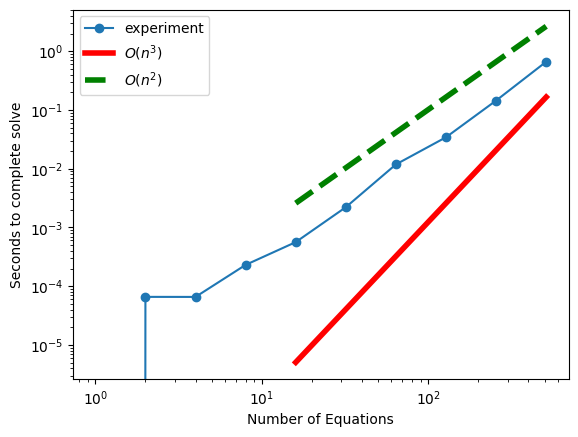

In [ ]:
import time

# Number of times to repeat the test for each size
num_tests = 10

# Values of N to test
N = 2**np.arange(num_tests)

# Store timing results
times = np.zeros(num_tests)

# Loop over tests
for test in range(1,num_tests):
    # generate random linear system
    A = np.random.rand(N[test],N[test])
    b = np.dot(A,np.ones(N[test]))
    x = np.zeros(N[test])

    # start timer
    start = time.perf_counter()

    # run Gaussian elimination
    aug = GaussElim(A,b)
    x = BackSub(aug)

    # end time
    end = time.perf_counter()

    # store time result
    times[test] = end-start

# create log-log plot
plt.loglog(N,times,'o-',label="experiment")

#make a comparison line with slope 2^3
y_comp = times.copy()/4
for comp_place in range(num_tests-1,0,-1):
    #because x goes up by factor 2 each time, time should go up by 8
    y_comp[comp_place -1] = np.exp(np.log(y_comp[test])-3*(np.log(N[test])-np.log(N[comp_place-1])))
plt.loglog(N[4:num_tests],y_comp[4:num_tests],'r',linewidth=4,label="$O(n^3)$")

#make a comparison line with slope 2^2
y_comp = times.copy()*4
for comp_place in range(num_tests-1,0,-1):
    y_comp[comp_place -1] = np.exp(np.log(y_comp[test])-2*(np.log(N[test])-np.log(N[comp_place-1])))
plt.loglog(N[4:num_tests],y_comp[4:num_tests],'g--',linewidth=4,label="$O(n^2)$")

# add labels and legend
plt.xlabel("Number of Equations")
plt.ylabel("Seconds to complete solve")
plt.legend()
plt.show()

In this figure the red line is a slope of 3 on a log-log scale (which corresponds time growing as the number of equations to the third power).  If the time to solve a system was consistent with the theory, then these dots would be parallel to the red line.  That assumes that the time it takes to execute the code is linearly related to the number of floating point operations.
The actual slope is closer to 2, the slope of the green dashed line.  This implies that the time to solution is not growing as fast as the theory.  The reason for this is that python (probably numpy) is helping us out and grouping operations together and executing some of them in parallel so that the number of floating point operations is not linearly related to the time.

In [ ]:
import scipy.linalg as la
import numpy as np

## Solving a Linear System with Python

Now let's solve this system of equations with Python. Tip: `scipy` is a little more sophisticated than `numpy`. Read more [here](https://docs.scipy.org/doc/scipy/tutorial/linalg.html#).

In [ ]:
A = np.array([[3, 2, 1], [-1, 4, 5], [2, -8, 10]])
print("A=\n",A)

# Define b
### BEGIN SOLUTION
b = np.array([6,8,4])
### END SOLUTION
print("b=\n",b)

# Calculate x using la.solve
### BEGIN SOLUTION
x = la.solve(A,b)
### END SOLUTION
print("x=\n",x)



A=
 [[ 3  2  1]
 [-1  4  5]
 [ 2 -8 10]]
b=
 [6 8 4]
x=
 [1. 1. 1.]


We can also use Python to calculate the reduced row echelon form. First, let's use `sympy`.

In [ ]:
from sympy import Matrix

# Define A
A_ = Matrix([[3, 2, 1], [-1, 4, 5], [2, -8, 10]])
print("A=\n",A_)

# Define B
b_ = Matrix([6,8,4])
print("b=\n",b_)

# Create augmented matrix
aug_ = A_.row_join(b_)
print("aug=\n",aug_)

# Calculate reduced row eschelon form
rref_ = aug_.rref()
print(rref_)

A=
 Matrix([[3, 2, 1], [-1, 4, 5], [2, -8, 10]])
b=
 Matrix([[6], [8], [4]])
aug=
 Matrix([[3, 2, 1, 6], [-1, 4, 5, 8], [2, -8, 10, 4]])
(Matrix([
[1, 0, 0, 1],
[0, 1, 0, 1],
[0, 0, 1, 1]]), (0, 1, 2))


`Sympy` performs symbolic computations which are great for teaching but often too slow for numerically solving large problems (e.g., compuational fluid dynamics simulation). We'll focus on using `scipy` for most of this class, although you should be comfortable converting the reduced row echelon form of the augmented matrix back into the solution of the linear system.

## Extending Gaussian Elimination to Invert a Matrix

Now let's "open the black box" to see how `scipy`/`numpy` numerically calculates the inverse. Start by studying [](../04/Gauss-Elimination.ipynb) which converts our by-hand Gaussian elimination calculation into pseudocode and then Python code.

As discussed on pg. 199 of Savov, we can calculate the inverse of a matrix $\bf A$ by assembling the augemented matrix

$$ \begin{bmatrix} {\bf A} & {\bf I} \end{bmatrix} $$

and applying Gauss-Jordan elimination to obtain:

$$ \begin{bmatrix} {\bf I} & {\bf A}^{-1} \end{bmatrix}$$

**Assignment**:
1. Modify the `GaussElim` and `BackSub` functions from [](../04/Gauss-Elimination.ipynb) to perform Gauss-Jordan elimination. As written, these functions first perform Gaussian elimination to produce zeros below the diagonal in the augmented matrix. Next, a backsolve is performed to solve the linear system. This needs to be modified to instead converted the augmented matrix into reduced row eschelon form, i.e., the left of the augmented matrix should be the identify matrix.
2. Test your function by solving the linear system example ${\bf A x} = {\bf b}$ used earlier in this notebook. In other words, you should be able to reproduce the RREF calculated above with `sympy`.
2. Use your function to calculate the matrix inverse ${\bf A}^{-1}$.
3. Tip: You do not need to worry about pivoting. While pivoting is important for numeric stability, it adds complexity.

## Understanding the Determinant

Consider the matrices

$$
{\bf A} = \begin{bmatrix} 2 & 1 \\ 3 & 4 \end{bmatrix}, \qquad {\bf B} = \begin{bmatrix} 0 & 3 \\ 2 & 1 \end{bmatrix}
$$

Caculate det(${\bf A}$) with paper and pencil.

Use `numpy` and `scipy` to numerically verify the following properties of the determinant.

In [ ]:
A = np.array([[2, 1], [3, 4]])

### BEGIN SOLUTION
B = np.array([[0, 3], [2, 1]])
### END SOLUTION

[[0 3]
 [2 1]]


det(${\bf A}$) = det(${\bf A}^T$)

Does the numerical answer match your pencil and paper calculation of det(${\bf A}$)?

In [ ]:
print("det(A) =", la.det(A))

### BEGIN SOLUTION
print("det(A^T) =", la.det(A.transpose()))
### END SOLUTION

det(A) = 5.0
det(A^T) = 5.0


Is ${\bf A}$ invertable?


det(${\bf I}$) = 1

In [ ]:
### BEGIN SOLUTION
I = np.identity(3)
print("I =\n", I)
print("det(I) = ", la.det(I))
### END SOLUTION

I =
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
det(I) =  1.0


det($\bf A B$) = det($\bf A$)det($\bf B$) = det($\bf B$)det($\bf A$) = det($\bf B A$)

In [ ]:
print("det(AB) =",la.det(A @ B))

### BEGIN SOLUTION
print("det(A) =", la.det(A))
print("det(B) =", la.det(B))
print("det(A)*det(B)",la.det(A)*la.det(B))
print("det(BA) =",la.det(B@A))
### END SOLUTION

det(AB) = -30.000000000000007
det(A) = 5.0
det(B) = -6.0
det(A)*det(B) -30.0
det(BA) = -30.0


Is ${\bf B}$ invertable?

det($\alpha \bf A$) = $\alpha^n$ det($\bf A$), where $\alpha$ is a scalar

In [ ]:
### BEGIN SOLUTION
alpha = 4
n = A.shape[0]
print("det(alpha*A) =", la.det(alpha*A))
print("alpha^n*det(A) =", alpha**n*(la.det(A)))
### END SOLUTION

det(${\bf A}$) = $\prod_i \lambda_i$, where $\lambda_i$ are the eigenvalues of $\bf A$

In [ ]:
w = la.eigvals(A)

### BEGIN SOLUTION
print("det(A) = ",la.det(A))
print("prod(eigenvals) = ",np.prod(w))
### END SOLUTION


## Submission

Download this notebook as a .ipynb file and submit to Canvas.



# Homework Completion

In [64]:
def GaussElim(A, b, LOUD=False):
    """create a Gauss-Jordan elimination matrix for a system (RREF)

    Args:
        A: N by N array
        b: array of length N
    Returns:
        augmented matrix in reduced row echelon form
    """
    # Extract dimensions of A
    [Nrow, Ncol] = A.shape

    # Check that A is square
    assert Nrow == Ncol

    N = Nrow

    # create augmented matrix
    aug_matrix = np.zeros((N,(2*N)))
    aug_matrix[0:N,0:N] = A.copy()
    aug_matrix[:, N:] = b.copy()


    if LOUD:
        print("Initial Augmented Matrix = \n", aug_matrix)

    # loop over columns (pivot columns)
    for column in range(0, N):
        
        # STEP 1: Normalize the pivot row (make diagonal element = 1)
        pivot_element = aug_matrix[column, column]
        aug_matrix[column, :] = aug_matrix[column, :] / pivot_element
        
        if LOUD:
            print(f"After normalizing row {column}:\n", aug_matrix)

        # STEP 2: Eliminate ALL other rows in this column (both above and below)
        for row in range(0, N):
            if row != column:  # Skip the pivot row itself
                # Calculate multiplier
                multiplier = aug_matrix[row, column]
                
                # Eliminate the element in this column
                aug_matrix[row, :] -= multiplier * aug_matrix[column, :]

        if LOUD:
            print(f"After eliminating column {column}:\n", aug_matrix)    
    
    return aug_matrix

## Display of Method

In [65]:
A = np.array([[3, 2, 1], [-1, 4, 5], [2, -8, 10]])
print("A=\n",A)

# Define B
I =  np.eye(3)
print("B=\n",I)


x = GaussElim(A,I)


# Verify our result by computing the inverse using NumPy
A_inv_numpy = np.linalg.inv(A)
print("\nNumPy inverse of A:\n", A_inv_numpy)

# Compare with our Gauss elimination result
print("\nOur Gauss elimination result:\n", x[:, 3:])



A=
 [[ 3  2  1]
 [-1  4  5]
 [ 2 -8 10]]
B=
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

NumPy inverse of A:
 [[ 0.28571429 -0.1         0.02142857]
 [ 0.07142857  0.1        -0.05714286]
 [ 0.          0.1         0.05      ]]

Our Gauss elimination result:
 [[ 0.28571429 -0.1         0.02142857]
 [ 0.07142857  0.1        -0.05714286]
 [ 0.          0.1         0.05      ]]
